# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Sinsin Triana Kian Q
- **Email:** sinsintrianakianq@gmail.com
- **ID Dicoding:** sinsin_triana

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berperan aktif terhadap banyaknya pengguna sepeda?

- Bagaimana suasana ketika sepeda digunakan pada holiday, weekday, dan workingday?

- Apakah musim memiliki pengaruh terhadap sewa sepeda berdasar pada pelanggan Casual dan Registered?

## Import Semua Packages/Library yang Digunakan

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data


##### Saya akan menggunakan Bike Sharing Dataset

### Berikut Tabel day

In [2]:
day_df = pd.read_csv("C:/Users/sinsi/Documents/Bangkit 2024/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Berikut Tabel Hour

In [3]:
hour_df = pd.read_csv("C:/Users/sinsi/Documents/Bangkit 2024/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Cek Tipe Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


 Data dteday perlu diperbaiki menjadi datetime

Cek Terdapat Missing Value Tidak

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tabel day_df tidak terdapat missing value

Cek Terdapat Data Yang Duplicate Tidak

In [6]:
print("Jumlah data yang duplikasi: ", day_df.duplicated().sum())

Jumlah data yang duplikasi:  0


Disimpulkan tabel day_df bersifat unik

Tabel Statistik day_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Nilai statistik untuk tabel day_df tidak ada yang aneh

Cek Tipe Data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


 Data dteday perlu diperbaiki menjadi datetime

Cek Terdapat Missing Value Tidak

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tabel hour_df tidak terdapat missing value

Cek Terdapat Data Yang Duplicate Tidak

In [10]:
print("Jumlah data yang duplikasi: ", hour_df.duplicated().sum())

Jumlah data yang duplikasi:  0


Disimpulkan tabel hour_df bersifat unik

Tabel Statistik hour_df

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Nilai statistik untuk tabel hour_df tidak ada yang aneh

### Cleaning Data

Hapus tabel yang tidak diperlukan:
Table hour_df akan dihapus karna tidak relevan dengan pertanyaan bisnis yang saya tetapkan.

In [12]:
del hour_df

Hapus kolom yang tidak diperlukan:
untuk pertanyaan bisnis saya 

In [13]:
drop_column = ['windspeed', 'instant']

for k in day_df.columns:
  if k in drop_column:
    day_df.drop(labels=k, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Ubah judul kolom 

In [14]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Ubah tipe data menjadi bentuk kategorikal

In [15]:
# Mengubah angka menjadi keterangan
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})


In [16]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubah tipe data ke kategorikal
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_condition.astype('category')
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count,weather_cond
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985,Misty/Cloudy
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801,Misty/Cloudy
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349,Clear/Partly Cloudy
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562,Clear/Partly Cloudy
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600,Clear/Partly Cloudy


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    object        
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  hum                731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  count              731 non-null    int64         
 14  weather_co

## Exploratory Data Analysis (EDA)

### Explore Tabel Day_df

Mengelompokan pengguna sepeda berdasarkan bulan

In [18]:
day_df.groupby(by='month').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

C:\Users\sinsi\AppData\Local\Temp\ipykernel_1228\3659636502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        min   max         mean     sum
month                                 
Apr     795  7460  4484.900000  269094
Aug    1115  7865  5664.419355  351194
Dec     441  6606  3403.806452  211036
Feb    1005  5062  2655.298246  151352
Jan     431  4521  2176.338710  134933
Jul    3285  8173  5563.677419  344948
Jun    3767  8120  5772.366667  346342
Mar     605  8362  3692.258065  228920
May    2633  8294  5349.774194  331686
Nov    1495  6852  4247.183333  254831
Oct      22  8156  5199.225806  322352
Sep    1842  8714  5766.516667  345991

Bulan Juni menjadi bulan dengan Rata-rata terbesar dan jumlah terbanyak, sedangkan Bulan Januari menjadi bulan dengan  rata-rata terkecil dan jumlah terkecil.

Mengelompokan pengguna sepeda berdasarkan keadaan cuaca

In [19]:
day_df.groupby(by='weather_condition').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

count                            
                      min   max         mean      sum
weather_condition                                    
Clear/Partly Cloudy   431  8714  4876.786177  2257952
Light Snow/Rain        22  4639  1803.285714    37869
Misty/Cloudy          605  8362  4035.862348   996858

ketika cuaca Clear/Partly Cloudy banyak sekali pengguna sepeda namun sangat sedikit pengguna sepeda saat cuacaLight Snow/Rain.

Membandingkan pengguna sepeda saat weekday dengan weekend

In [20]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean','sum']
})

C:\Users\sinsi\AppData\Local\Temp\ipykernel_1228\4229901467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

rata rata penguna sepeda terbesar dihari Friday dan terkecil pada hari sunday.

Mengelompokan pengguna sepeda saat workingday

In [21]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\sinsi\AppData\Local\Temp\ipykernel_1228\171665669.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Penguna sepeda terbesar saat workingday dibandingkan dengan hari non-workingday

Mengelompokan pengguna sepeda berdasarkan season

In [22]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\sinsi\AppData\Local\Temp\ipykernel_1228\2342302477.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                            
               mean         mean   max   min         mean      sum
season                                                            
Fall    1202.611702  4441.691489  8714  1115  5644.303191  1061129
Spring   334.928177  2269.204420  7836   431  2604.132597   471348
Summer  1106.097826  3886.233696  8362   795  4992.331522   918589
Winter   729.112360  3999.050562  8555    22  4728.162921   841613

 Saat musim fall para Pengguna sepeda (Casual Dan Registered) lebih suka bersepeda dilihat dari rata-ratanya. Sedangkan yang paling sedikit saat musim Spring yang ditunjukan oleh rata-rata terkecil.

Mengelompokan temp, hum, dan humidity berdasarkan season

In [23]:
day_df.groupby(by='season').agg({
    'atemp': ['min', 'max', 'mean'],
    'temp': ['min', 'max', 'mean'],
    'hum': ['min', 'max', 'mean']
})
     

C:\Users\sinsi\AppData\Local\Temp\ipykernel_1228\94240369.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


atemp                          temp                           hum  \
             min       max      mean       min       max      mean       min   
season                                                                         
Fall    0.242400  0.840896  0.655898  0.469167  0.861667  0.706309  0.360000   
Spring  0.079070  0.548617  0.296914  0.059130  0.572500  0.297748  0.000000   
Summer  0.250339  0.757579  0.520307  0.253043  0.808333  0.544405  0.254167   
Winter  0.227913  0.607975  0.415539  0.220833  0.657500  0.422906  0.333478   

                            
             max      mean  
season                      
Fall    0.939565  0.633482  
Spring  0.948261  0.582903  
Summer  0.922500  0.626948  
Winter  0.972500  0.668719

Rata-rata temperatur dan atemp tertinggi pada musim fall dilanjutkan summer, winter, dan spring.
Rata-rata humidity tertinggi pada musim winter dilanjutkan fall, summer, dan spring.

Korelasi antara pengguna sepeda casual, registered, dan count

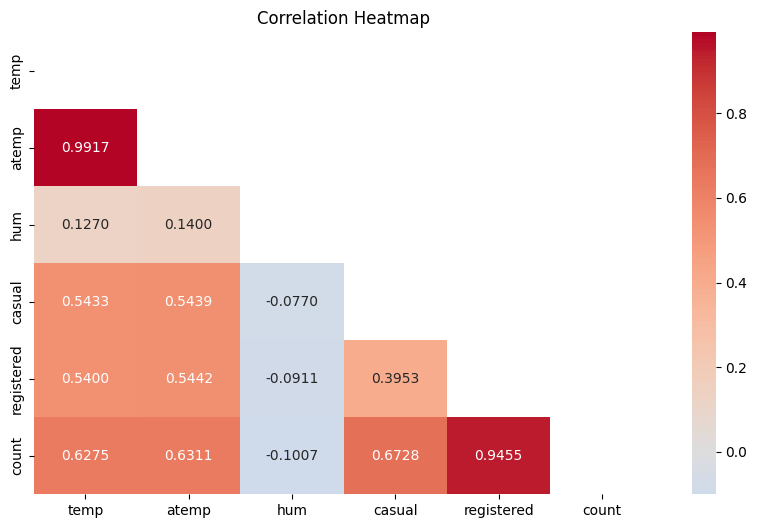

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
corr_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".4f")
plt.title("Correlation Heatmap")
plt.show()
     

- atemp dan temp sangat berkorelasi (0.9917).
- hum memiliki korelasi lemah dengan temp dan atemp (0.1270 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.5433), dan sedikit negatif dengan hum (-0.077).
- registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.3953).
count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.6275, 0.6311, 0.6728, dan 0.9455), dan sedikit negatif dengan hum (-0.10007).

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apakah cuaca berperan aktif terhadap banyaknya pengguna sepeda?


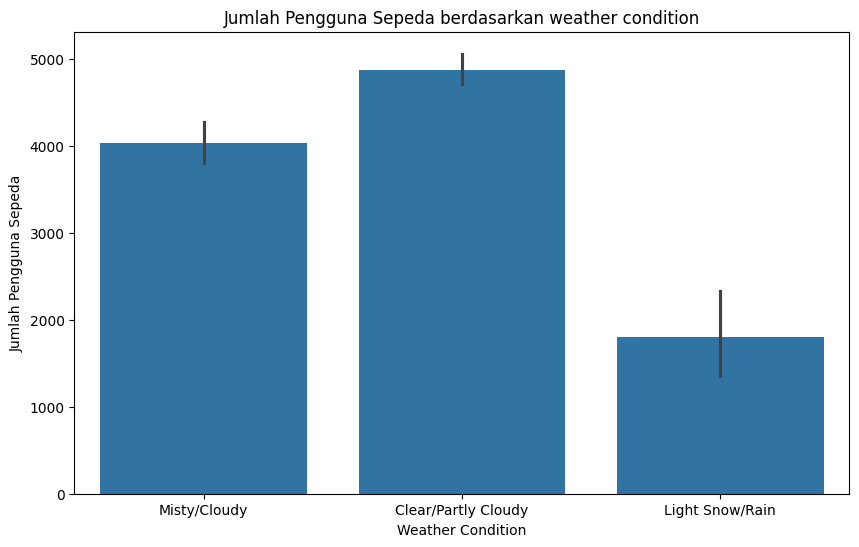

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_condition',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan weather condition')
plt.xlabel('Weather Condition')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Menggunakan boxplot sangat jelas bahwa terdapat hubungan antara weather condition dan pengguna sepeda.
Cuaca Clear/Partly Cloudy paling diminati oleh pengguna sepeda dilanjuti oleh cuaca misty/cloudy dan paling sedikit saat cuaca light snow/rain.

### Pertanyaan 2: Bagaimana suasana ketika sepeda digunakan pada holiday, weekday, dan workingday?

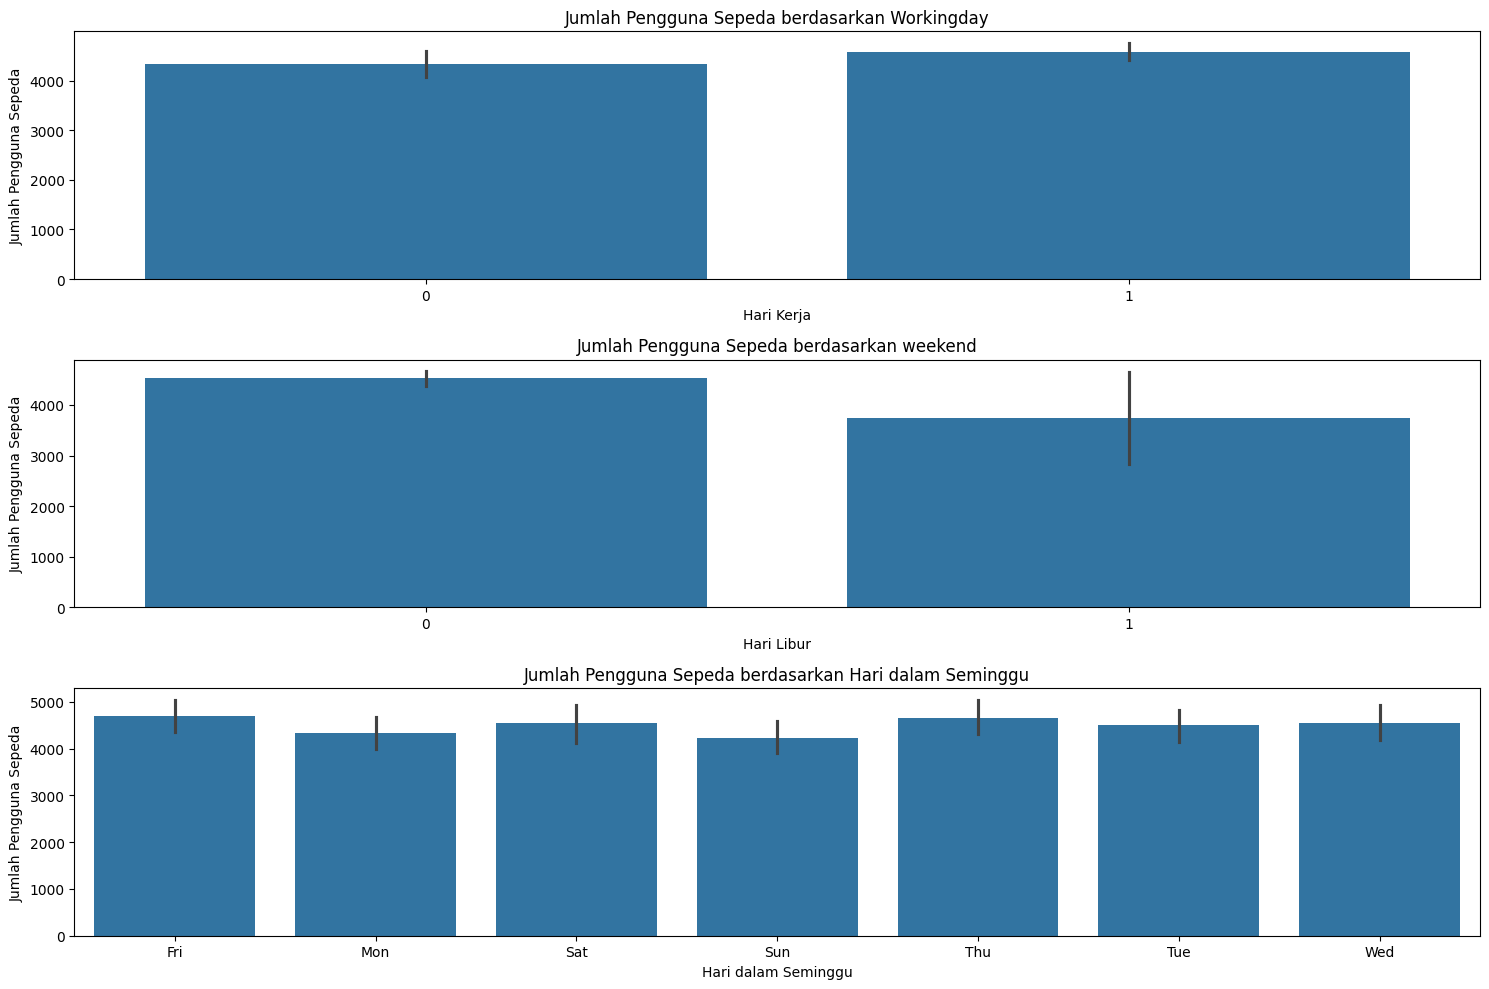

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Workingday')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan weekend')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Menggunakan barplot

- Jumlah pengguna sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada akhir pekan (yakni sabtu dan minggu). 

- Jumlah pengguna sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur.

- Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 3: Apakah musim memiliki pengaruh terhadap sewa sepeda berdasar pada pelanggan Casual dan Registered?

C:\Users\sinsi\AppData\Local\Temp\ipykernel_1228\309906098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


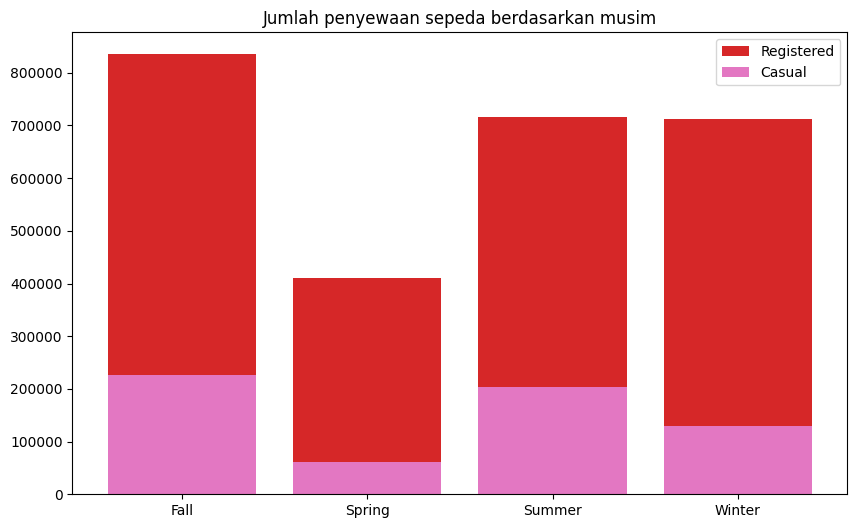

In [27]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:pink'
)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Menggunakan barplot
Musim fall menjadi musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered)  dilanjutkan oleh musim Summer, Winter dan Spring.

## Conclusion

- Conclution pertanyaan 1 
Terdapat hubungan antara weather condition dan pengguna sepeda.
Cuaca Clear/Partly Cloudy paling diminati oleh pengguna sepeda dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000.
dilanjuti oleh cuaca misty/cloudy dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000.
dan paling sedikit saat cuaca light snow/rain dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000. Dan untuk cuaca ketika Severe Weather tidak ada datanya, karena memang tidak memungkinan untuk bersepeda ketika Severe Weather.

- Conclution pertanyaan 2:
Untuk jumlah pengguna sepeda berdasarkan workingday, workingday mengungguli non-workingday walaupun tidak terlalu signifikan. Berdasarkan holiday, non-holiday cukup signifikan daripada yang holiday. Hal ini dapat terjadi jika pengguna sepeda lebih menyukai sewa sepeda saat hari-hari biasa saja. Terakhir berdasarkan weekday,hari Jumatlah yang menempati urutan pertama dengan mean 4690.288462 dan di urutan terakhir ditempati oleh Minggu: 4228.828571.

- Conclusion pertanyaan 3: 
Musim dingin (Winter) tidak menjadi yang terakhir, melainkan yang terakhir adalah musin semi (Spring). Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sedangkan urutan pertamanya ditempati oleh musim gugur (Fall) yang mampu meraih penyewaan sepeda sebanyak lebih dari 800000.